In [2]:
# 패키지 Import / 없는 패키지는 설치 -> import 
# 패키지를 불러왔습니다. 
import pandas as pd
import numpy as np 
import statistics

In [3]:
data = [1,1,2,3,6,7,7,7,7,7,7]
# 7 : 4 / 1: 2 

In [4]:
# 데이터의 평균 
# print 출력  
print(np.mean(data))

5.0


In [5]:
# 데이터의 중앙값 
print(np.median(data))

7.0


In [6]:
from scipy.stats import mode
# 데이터의 최빈값 
mode(data)
# data = [1,1,2,3,5] 1:2번

ModeResult(mode=array([7]), count=array([6]))

In [7]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [8]:
# 상관관계 구해보기 
# read _csv : csv 가져옴
학생데이터=pd.read_csv("/drive/MyDrive/Colab Notebooks/DLBasics/학생데이터2.csv",
                  encoding="cp949")
학생데이터

,학생명,시험점수,출석률,키,몸무게,나이,도서관이용시간
0,김지선,88,100,150,50,23,132
1,김순쟈,76,89,158,68,25,89
2,소이현,56,70,170,80,34,30
3,강바다,34,50,180,85,23,20
4,이채민,23,55,160,65,44,40
5,이소영,67,40,165,66,33,30
6,진수진,48,20,177,70,29,40
7,강비단,99,90,165,50,20,80


In [9]:
학생데이터[['학생명', '시험점수']]

,학생명,시험점수
0,김지선,88
1,김순쟈,76
2,소이현,56
3,강바다,34
4,이채민,23
5,이소영,67
6,진수진,48
7,강비단,99


In [10]:
학생데이터.tail(2)

,학생명,시험점수,출석률,키,몸무게,나이,도서관이용시간
6,진수진,48,20,177,70,29,40
7,강비단,99,90,165,50,20,80


In [11]:
# Q : 학생들의 시험점수를 예측하고싶음 
# 주어진 데이터 : 시험점수, 출석률, 키, 몸무게, 나이, 도서관이용시간 

# 예측값, 알고 있는 값 

학생데이터[["학생명","시험점수"]].head(3)

,학생명,시험점수
0,김지선,88
1,김순쟈,76
2,소이현,56


In [12]:
# 학생 데이터 모든 데이터가 다 불러와짐 
학생데이터.시험점수.mean()

61.375

In [13]:
학생데이터.시험점수.median()

61.5

In [14]:
# 전체적인 데이터 분포 파악을 하는 함수 : describe()
# mean, median  - > 기술통계를 구할 수 있다. 
학생데이터.describe()

,시험점수,출석률,키,몸무게,나이,도서관이용시간
count,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000
mean,61.375000,64.25000,165.625000,66.750000,28.875000,57.625000
std,26.185806,27.82984,9.927415,12.452768,7.881941,38.876866
min,23.000000,20.00000,150.000000,50.000000,20.000000,20.000000
25%,44.500000,47.50000,159.500000,61.250000,23.000000,30.000000
50%,61.500000,62.50000,165.000000,67.000000,27.000000,40.000000
75%,79.000000,89.25000,171.750000,72.500000,33.250000,82.250000
max,99.000000,100.00000,180.000000,85.000000,44.000000,132.000000


In [15]:
# 앞에 3행만 가지고 오고싶을 때 
학생데이터[학생데이터["시험점수"]>70].mean()

시험점수        87.666667
출석률         93.000000
키          157.666667
몸무게         56.000000
나이          22.666667
도서관이용시간    100.333333
dtype: float64

In [16]:
# tail -> 뒤에 몇행만 가지고 올때 
학생데이터.tail(2)

,학생명,시험점수,출석률,키,몸무게,나이,도서관이용시간
6,진수진,48,20,177,70,29,40
7,강비단,99,90,165,50,20,80


In [17]:
print(학생데이터)

   학생명  시험점수  출석률    키  몸무게  나이  도서관이용시간
0  김지선    88  100  150   50  23      132
1  김순쟈    76   89  158   68  25       89
2  소이현    56   70  170   80  34       30
3  강바다    34   50  180   85  23       20
4  이채민    23   55  160   65  44       40
5  이소영    67   40  165   66  33       30
6  진수진    48   20  177   70  29       40
7  강비단    99   90  165   50  20       80


In [18]:
# 시험 점수가 88 또는 99인 사람을 가지고 오고 싶다 
학생데이터[(학생데이터["시험점수"]==88)|(학생데이터["시험점수"]==99)]

# 학생명 : 한글 (문자) 영어 -> ""
# 키 : 숫자 150  -> "" x

,학생명,시험점수,출석률,키,몸무게,나이,도서관이용시간
0,김지선,88,100,150,50,23,132
7,강비단,99,90,165,50,20,80


In [19]:
학생데이터[학생데이터["학생명"]=="강바다"]

,학생명,시험점수,출석률,키,몸무게,나이,도서관이용시간
3,강바다,34,50,180,85,23,20


In [20]:
# 학생데이터가 진수진인 학생만 뽑아오도록 
학생데이터[학생데이터["학생명"]=="진수진"]

,학생명,시험점수,출석률,키,몸무게,나이,도서관이용시간
6,진수진,48,20,177,70,29,40


In [20]:
print(학생데이터)

   학생명  시험점수  출석률    키  몸무게  나이  도서관이용시간
0  김지선    88  100  150   50  23      132
1  김순쟈    76   89  158   68  25       89
2  소이현    56   70  170   80  34       30
3  강바다    34   50  180   85  23       20
4  이채민    23   55  160   65  44       40
5  이소영    67   40  165   66  33       30
6  진수진    48   20  177   70  29       40
7  강비단    99   90  165   50  20       80


<h1> 상관계수를 구해봅시다 <h1> 

In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 한글(나눔글꼴) 다운 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [21]:
# 상관관계를 구하는 함수 
# corr : 상관관계 
# 나이랑 몸무게의 상관계수는? 

# <상관관계(correlation)>
# 변수 변수의 관계 (온도, 아이스크림 판매량)
# 양의 상관관계 1, 음의 상관관계 -1 가깝다 
# - 1 < 0 < 1 값, 0에 가까울수록 상관관계가 없다 

학생데이터.corr()

# Q1 : 몸무게와 나이의 상관관계는? --> 0.25
# Q1.1 : 상관관계를 가지고 있나? --> 거의 없음

# Q2 : 도서관이용시간이랑 나이의 상관관계는?
# 상관계수 : -0.49
# 상관관계 : 

,시험점수,출석률,키,몸무게,나이,도서관이용시간
시험점수,1.000000,0.676749,-0.498914,-0.705007,-0.673206,0.731969
출석률,0.676749,1.000000,-0.713178,-0.532790,-0.434231,0.792461
키,-0.498914,-0.713178,1.000000,0.728304,-0.039025,-0.799934
몸무게,-0.705007,-0.532790,0.728304,1.000000,0.252888,-0.778946
나이,-0.673206,-0.434231,-0.039025,0.252888,1.000000,-0.494353
도서관이용시간,0.731969,0.792461,-0.799934,-0.778946,-0.494353,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


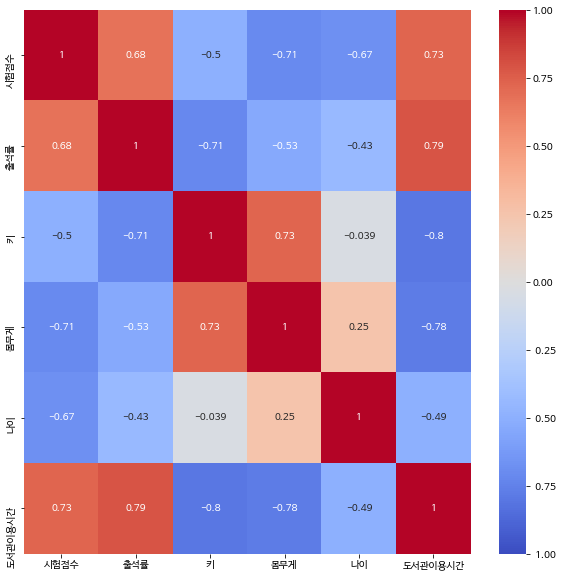

In [37]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10) # 사이즈 
plt.rc('font', family='NanumBarunGothic') # 폰트 : 나눔바른고딕  

sb.heatmap(학생데이터.corr(),
           annot = True, # 실제 값 화면에 나타내기
           cmap = 'coolwarm', # 색상
           vmin = -1, vmax=1 , # 컬러차트 영역 -1 ~ +1
           )
# Greens , PiYG

In [23]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXSizeOneSym',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'cmsy10',
 'STIXSizeFiveSym',
 'STIXGeneral',
 'DejaVu Serif',
 'STIXSizeTwoSym',
 'cmmi10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeOneSym',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'cmex10',
 'cmss10',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Serif',
 'cmr10',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXNonUnicode',
 'DejaVu Serif',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Liberation Sans',
 'NanumGothic',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'NanumBarunGothic',
 'Liberation Mono',
 'NanumMyeongjo',
 'NanumSquareRound',
 'NanumMyeongjo',
 'Liberation Sans',
 'NanumGothic',
 'Liberation Sans Narrow',
 'Liberation Sans Narrow',
 'Liberation Serif',
 '